<>:85: SyntaxWarning: invalid escape sequence '\s'
<>:98: SyntaxWarning: invalid escape sequence '\s'
<>:85: SyntaxWarning: invalid escape sequence '\s'
<>:98: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_127580\559332891.py:85: SyntaxWarning: invalid escape sequence '\s'
  '''
C:\Users\TXB909\AppData\Local\Temp\ipykernel_127580\559332891.py:98: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]
C:\Users\TXB909\AppData\Local\Temp\ipykernel_127580\559332891.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', len(dfs))


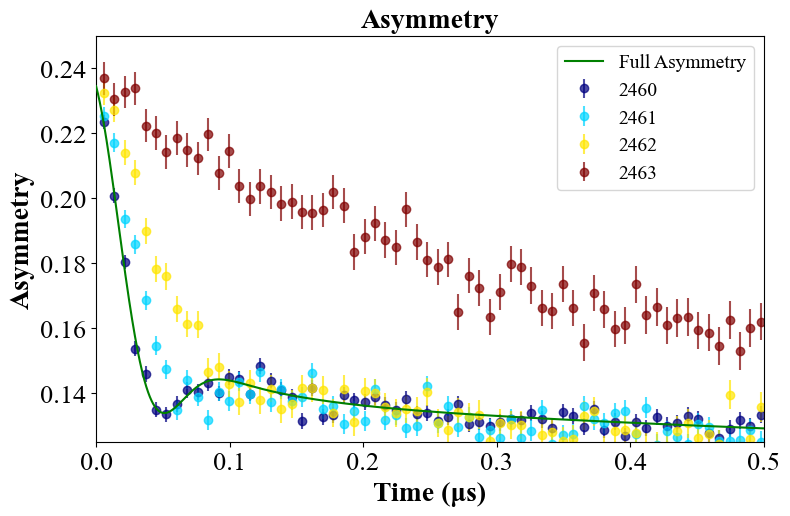

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt, font_manager as fm
plt.rcParams['figure.figsize'] = [6,3]

def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,             # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag       
    beta_tail=1,       # β_tail
    beta_para=1,          # β_2
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5          
):
    # Convert phase to radians
    phi_rad = np.pi * phi / 180
    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro
    #print(nu)

    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    return A

#path = 'C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

datafile = '2460_80pack_0_1.dat'

datafiles= ['2460_80pack_0_1.dat',
            #'2461_80pack_0_1.dat',
            #'2462_80pack_0_1.dat',
            #'2463_80pack_0_1.dat',
            #'2464_80pack_0_1.dat',
            #'2465_80pack_0_1.dat',
            '2466_80pack_0_1.dat',
            '2467_80pack_0_1.dat',
            '2468_80pack_0_1.dat',
            #'2469_80pack_0_1.dat',
            #'2470_80pack_0_1.dat',
            #'2471_80pack_0_1.dat',
            #'2472_80pack_0_1.dat',
]


times = np.linspace(0,1, 10000)
t=np.array(times)
f_F=0.8369
sigma=28.5
nu=501.1
phi=21.5
lam_tail=15.3
lam_para=1 
lam_Ag=0.038          # λ_Ag     
beta_tail=1       # β_ta   
beta_para=1         # β_2
beta_Ag=1
A_T=0.2392
Ag_F=0.5 

'''
df = pd.read_csv(path + datafile, sep=',\s*', engine='python')
plt.ylabel('Asymmetry')
plt.xlabel('Time (μs)')
x=df['xData0']
y=df['data0']
yerr=df['errData0']


plt.errorbar(x, y, yerr=yerr, fmt='vg',alpha=.5)
A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)
'''

dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]

cmap = cm.get_cmap('jet', len(dfs))

a= 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rcParams['figure.figsize'] = [8,5]

plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

for i, df in enumerate(dfs):
    x=df['xData0']
    y=df['data0']
    yerr=df['errData0']
    plt.errorbar(x, y, yerr=yerr, fmt='o', color=cmap(i),alpha=.7, zorder=1, label=f'{2460+i}')


A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)

plt.ylabel('Asymmetry',fontsize=20,weight='bold')
plt.xlabel('Time (μs)',fontsize=20,weight='bold')
plt.ylim(0.125,0.25)
plt.xlim(0,0.5)
plt.plot(times, A, label='Full Asymmetry', color='g', zorder=10)


plt.tight_layout()
plt.legend(loc='upper right',fontsize=14)
plt.title('Asymmetry',fontsize=20,weight='bold')
plt.show()



C:\Users\TXB909\AppData\Local\Temp\ipykernel_127580\1278382029.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


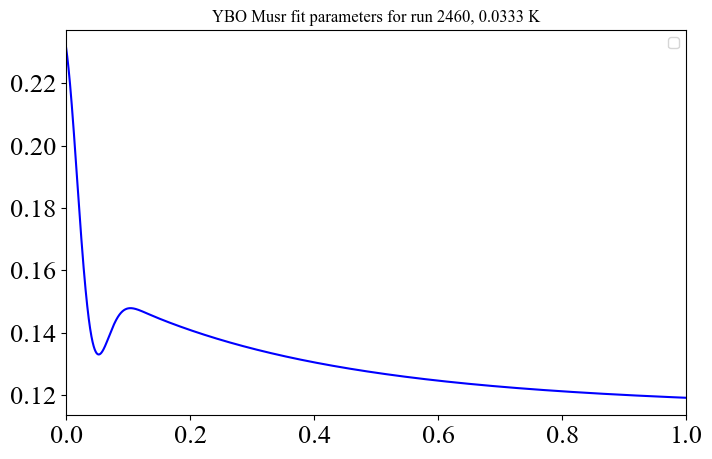

In [16]:
#adapted code below./ Adapted from New_format_plotting.ipynb. The goal is to take out the code that fits the constituent parts of the fit, so we can just fit the raw fit for any run we like from the data

#code to take musrfit output file and plot the desired run's different components
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#beta_fixed_post_lock_25_009.txt
def Plot_YBO_fit_components(run_no, datafile,x_min=0,x_max=1,points=10000, colour='b'):
    '''
    run_no: the run number from the msr file you want to plot.
    datafile: the datafile where the fit parameters are stored. This must be in the same subfolder, or use the full filepath, ensure it is a headered file exported from musrfit.
    x_min/x_max: limits in time domain (μs) of where you want to plot until
    points: number of points for the function to be plotted at, effective resolution 
    '''
    df = pd.read_csv(datafile, delim_whitespace=True)
    #df = pd.read_csv(datafile, sep=',\s*', engine='python')
    #print(f'headers are: {list(df)}')

    df_run = df[df['RUN']==run_no].squeeze() #to make a series not a dataframe so I can do maths on it easily when multiplying by times which is an array. squeeze makes these from series of length (1,) into scalars so there is no broadcasting errors.

    times = np.linspace(x_min,x_max, points)
    t=np.array(times)

    f_F=df_run['Order_Vfrac_2461']
    sigma=df_run['YBO_sigma_2461']
    nu=df_run['Frequency_2461']
    phi=df_run['Phase']
    lam_tail=df_run['Tail_Lambda_2461']
    lam_para=df_run['YBO_paraLam2_2461'] 
    lam_Ag=df_run['Ag_Lambda']          # λ_Ag     
    beta_tail=df_run['Tail_Beta_2461']       # β_ta   
    beta_para=df_run['YBO_paraBet2_2461']        # β_2
    beta_Ag=df_run['Ag_Beta']
    A_T=df_run['Asy_tot']
    Ag_F=df_run['Ag_frac']
    Temp=df_run['dataT']
    
    A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)

    phi_rad = np.pi * phi / 180

    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro




    #plt.ylim(0,0.25)
    #plt.axhline(0.2392,color = 'r', label='Original Asy_tot')
    plt.xlim(0,1)
    plt.title(f'YBO Musr fit parameters for run {run_no}, {Temp} K')
    plt.plot(times, A, color=colour)
    
Plot_YBO_fit_components(2460, 'beta1_July_08_002.txt')
plt.legend()
plt.show()







<>:92: SyntaxWarning: invalid escape sequence '\s'
<>:105: SyntaxWarning: invalid escape sequence '\s'
<>:92: SyntaxWarning: invalid escape sequence '\s'
<>:105: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_127580\3059330971.py:92: SyntaxWarning: invalid escape sequence '\s'
  '''
C:\Users\TXB909\AppData\Local\Temp\ipykernel_127580\3059330971.py:105: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]
C:\Users\TXB909\AppData\Local\Temp\ipykernel_127580\3059330971.py:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', len(dfs))
C:\Users\TXB909\AppData\Local\Temp\ipykernel_127580\1278382029.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated 

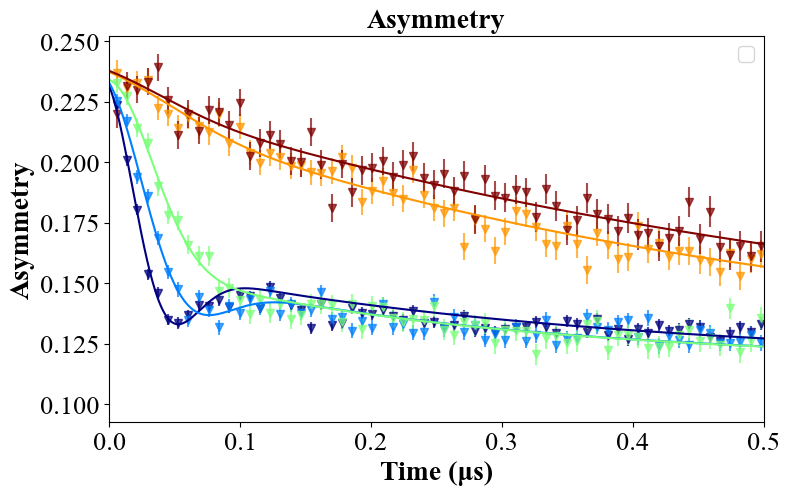

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt, font_manager as fm
plt.rcParams['figure.figsize'] = [6,3]

def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,             # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag       
    beta_tail=1,       # β_tail
    beta_para=1,          # β_2
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5          
):
    # Convert phase to radians
    phi_rad = np.pi * phi / 180
    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro
    #print(nu)

    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    return A

#path = 'C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

datafile = '2460_80pack_0_1.dat'

datafiles= ['2460_80pack_0_1.dat',
            #'2461_80pack_0_1.dat',
            #'2462_80pack_0_1.dat',
            #'2463_80pack_0_1.dat',
            #'2464_80pack_0_1.dat',
            #'2465_80pack_0_1.dat',
            '2466_80pack_0_1.dat',
            '2467_80pack_0_1.dat',
            '2468_80pack_0_1.dat',
            #'2469_80pack_0_1.dat',
            #'2470_80pack_0_1.dat',
            #'2471_80pack_0_1.dat',
            '2472_80pack_0_1.dat',
]

#to extract the run number from the datafile array:
run_number = [element[:4] for element in datafiles]
list(map(int, run_number))
#convert to integer for the function
run_number =[int(x) for x in run_number]



times = np.linspace(0,1, 10000)
t=np.array(times)
f_F=0.8369
sigma=28.5
nu=501.1
phi=21.5
lam_tail=15.3
lam_para=1 
lam_Ag=0.038          # λ_Ag     
beta_tail=1       # β_ta   
beta_para=1         # β_2
beta_Ag=1
A_T=0.2392
Ag_F=0.5 

'''
df = pd.read_csv(path + datafile, sep=',\s*', engine='python')
plt.ylabel('Asymmetry')
plt.xlabel('Time (μs)')
x=df['xData0']
y=df['data0']
yerr=df['errData0']


plt.errorbar(x, y, yerr=yerr, fmt='vg',alpha=.5)
A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)
'''

dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]

cmap = cm.get_cmap('jet', len(dfs))

a= 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rcParams['figure.figsize'] = [8,5]

plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

for i, df in enumerate(dfs):
    
    #Plot raw data
    x=df['xData0']
    y=df['data0']
    yerr=df['errData0']
    plt.errorbar(x, y, yerr=yerr, fmt='v', color=cmap(i),alpha=.7, zorder=1)#, label=f'{2460+i}')
    
    #Plot all Components
    run0=2460
    
    Plot_YBO_fit_components(run_number[i], 'beta1_July_08_002.txt', colour=cmap(i))
    #print(run_number[i]==2460)
    
    #plot full fit
    #A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)
    #plt.plot(times, A, label='Full Asymmetry', color='g', zorder=10)

    plt.ylabel('Asymmetry',fontsize=20,weight='bold')
    plt.xlabel('Time (μs)',fontsize=20,weight='bold')
    

plt.xlim(0,0.5)
plt.tight_layout()
plt.legend(loc='upper right',fontsize=14)
plt.title('Asymmetry',fontsize=20,weight='bold')
plt.show()

